#### 梯度上升求解PCA

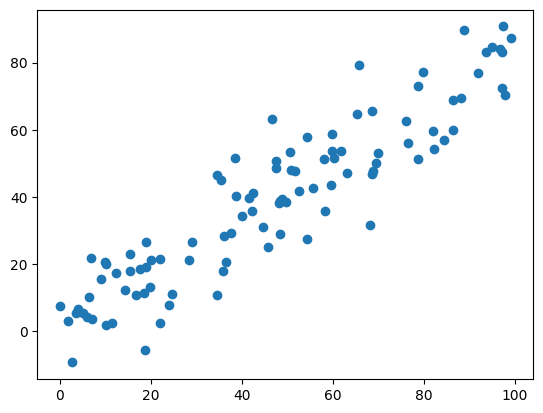

In [1]:
# 手动生成测试样例

import numpy as np
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size=100) # 生成0-100之间均匀分布的特征1
X[:,1] = 0.75*X[:,0] + 3 + np.random.normal(0,10,size=100) # 特征2与特征1呈线性关系，构成测试用例时，添加一些高斯噪声

# 可视化测试样例
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.show()

In [2]:
# 目标函数
def f(w,X):
    return (X.dot(w)).T.dot(X.dot(w))  / (len(X)-1)

In [3]:
# 解析式梯度
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2/ (len(X)-1)

In [4]:
# 模为1的方向向量
def direction(w):
    return w / np.linalg.norm(w)

In [5]:
# 梯度上升算法
def gradient_ascent(df,initial_w,X,eta,max_iters=1e4, epsilon=1e-8):
    # 取模为1的方向向量
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter<max_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter += 1
    return w

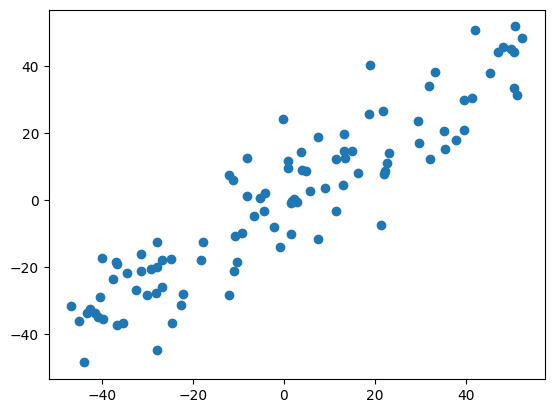

In [6]:
# demean
def demean(X):
    return X - np.mean(X,axis=0)

X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [7]:
# 利用梯度上升法求出最优的方向向量w
# 设置初值与步长
initial_w = np.random.random((X.shape[1]))
eta = 0.001

# 调用梯度上升算法
gradient_ascent(df_math,initial_w, X_demean, eta)

array([0.76017369, 0.64971991])

[0.76017369 0.64971991]


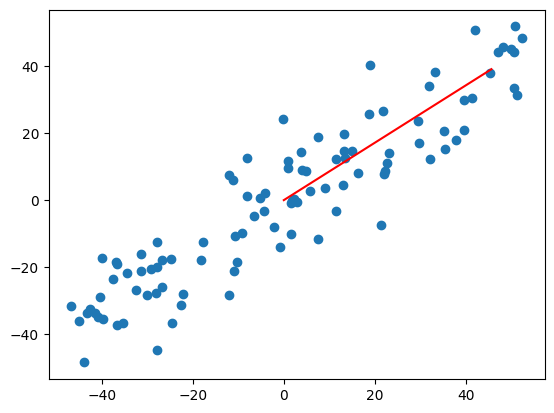

In [9]:
# 调用梯度上升算法
w = gradient_ascent(df_math,initial_w, X_demean, eta)
print(w)
# 绘制w方向
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0, w[0]*60], [0, w[1]*60], color='r')
plt.show()

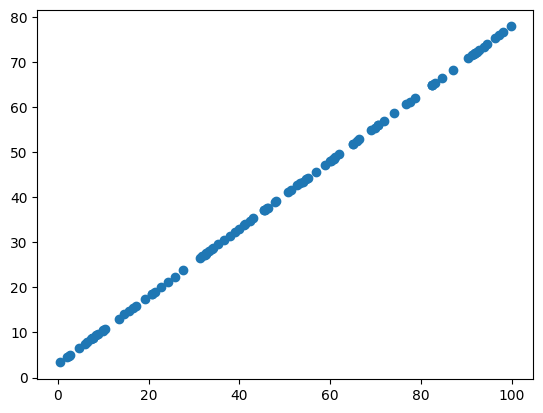

In [10]:
# 极端数据
X2 = np.empty((100,2))

X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3. # 完全线性，不含噪声
plt.scatter(X2[:,0],X2[:,1])
plt.show()

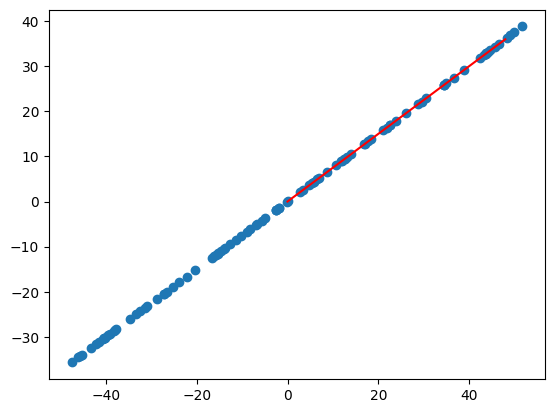

In [11]:
# demean
X2_demean = demean(X2)
# 设置初值与步长
initial_w = np.random.random((X2.shape[1]))
eta = 0.001
# 梯度上升法求解
w = gradient_ascent(df_math,initial_w, X2_demean, eta)
# 可视化
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w[0]*60], [0,w[1]*60], color = 'r')
plt.show()


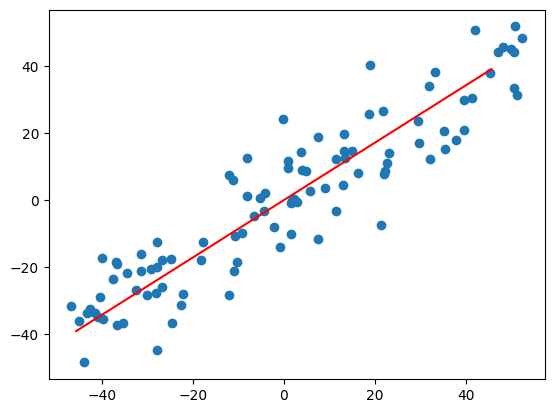

In [12]:
# 前n个主成分
w = gradient_ascent(df_math,initial_w, X_demean, eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([w[0]*(-60), w[0]*60], [w[1]*(-60), w[1]*60], color='r')
plt.show()
